# Automotive Vehicles Engine Health
#### Analyzing a Dataset on Automotive Engine Health for Predictive Maintenance and model building


The dataset includes various vehicle engine health characteristics and measurements, such as engine speed, temperature, pressure and other sensor data.

The objective of the project using this dataset is to build a predictive maintenance model for automotive engines. Investigating patterns and trends in the data, a machine learning model is trained and built to predict when an engine is likely to require maintenance or repair. This could help vehicle owners and mechanics proactively address potential problems before they become more severe, resulting in better vehicle performance and longer engine life.

Once trained, the model could be integrated into a larger system for monitoring the health of automotive engines. For example, sensors could be installed in vehicles to collect real-time data on engine performance, which could then be sent to a central server for analysis. The predictive maintenance model could then generate alerts or recommendations for maintenance or repair.

## Connecting to Google Drive

In [1]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import of all libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import random

## Data loading

In [3]:
data_path = "/content/drive/MyDrive/.../engine_data.csv"
data = pd.read_csv(data_path)

## Data overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [5]:
data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [6]:
data.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


### Engine rpm

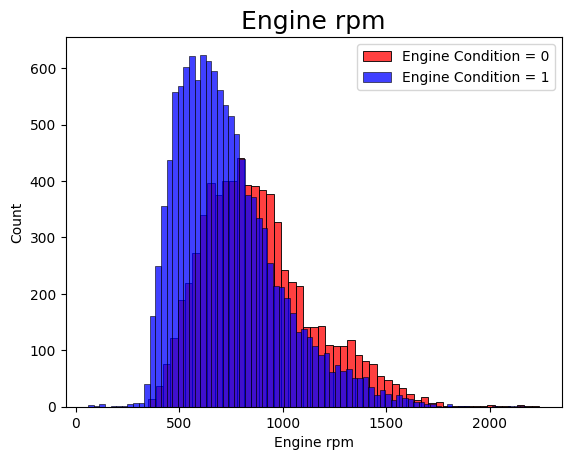

In [7]:
sns.histplot(data[data['Engine Condition']==0]['Engine rpm'], color='red')
sns.histplot(data[data['Engine Condition']==1]['Engine rpm'], color='blue')
plt.legend(labels=["Engine Condition = 0", "Engine Condition = 1"])
plt.title('Engine rpm', fontsize=18);

### Lub oil pressure

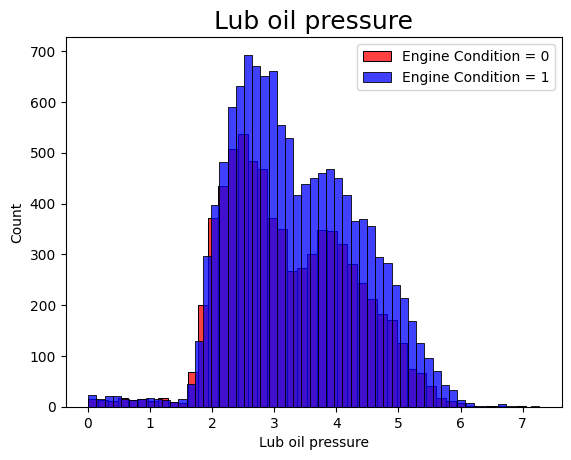

In [8]:
sns.histplot(data[data['Engine Condition']==0]['Lub oil pressure'], color='red')
sns.histplot(data[data['Engine Condition']==1]['Lub oil pressure'], color='blue')
plt.legend(labels=["Engine Condition = 0", "Engine Condition = 1"])
plt.title('Lub oil pressure', fontsize=18);

### Fuel pressure

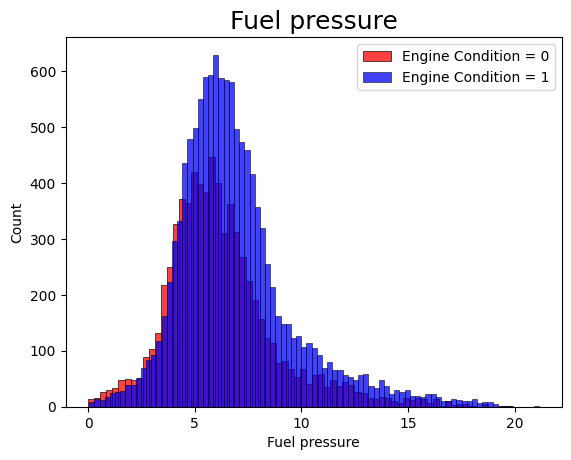

In [9]:
sns.histplot(data[data['Engine Condition']==0]['Fuel pressure'], color='red')
sns.histplot(data[data['Engine Condition']==1]['Fuel pressure'], color='blue')
plt.legend(labels=["Engine Condition = 0", "Engine Condition = 1"])
plt.title('Fuel pressure', fontsize=18);

### Coolant pressure

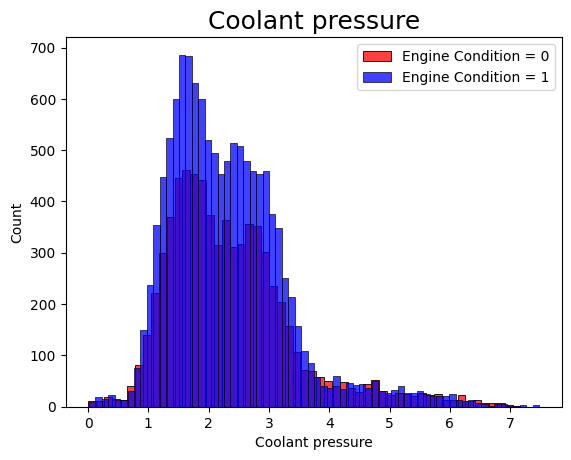

In [10]:
sns.histplot(data[data['Engine Condition']==0]['Coolant pressure'], color='red')
sns.histplot(data[data['Engine Condition']==1]['Coolant pressure'], color='blue')
plt.legend(labels=["Engine Condition = 0", "Engine Condition = 1"])
plt.title('Coolant pressure', fontsize=18);

### lub oil temp

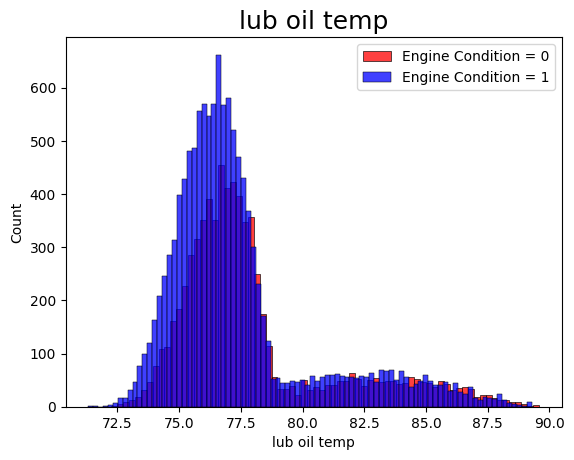

In [11]:
sns.histplot(data[data['Engine Condition']==0]['lub oil temp'], color='red')
sns.histplot(data[data['Engine Condition']==1]['lub oil temp'], color='blue')
plt.legend(labels=["Engine Condition = 0", "Engine Condition = 1"])
plt.title('lub oil temp', fontsize=18);

### Coolant temp

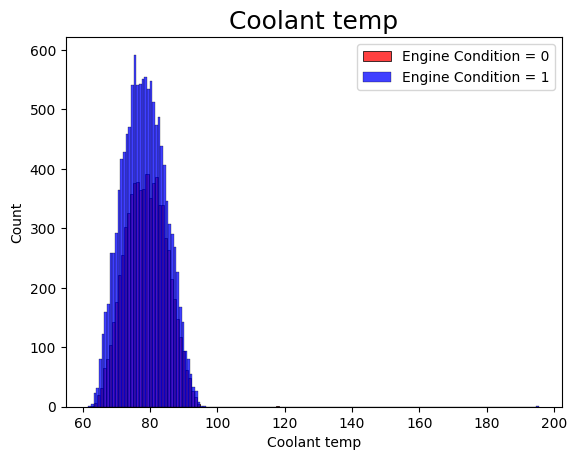

In [12]:
sns.histplot(data[data['Engine Condition']==0]['Coolant temp'], color='red')
sns.histplot(data[data['Engine Condition']==1]['Coolant temp'], color='blue')
plt.legend(labels=["Engine Condition = 0", "Engine Condition = 1"])
plt.title('Coolant temp', fontsize=18);

### Engine Condition

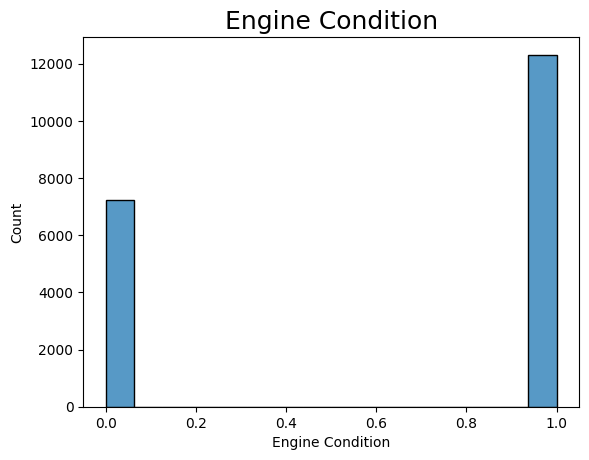

In [13]:
sns.histplot(data['Engine Condition'])
plt.title('Engine Condition', fontsize=18);

## Engine condition analysis

In [14]:
data['Engine Condition'].describe()

count    19535.000000
mean         0.630509
std          0.482679
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Engine Condition, dtype: float64

## Correlation

In [15]:
corr = data.corr()
corr

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
Engine rpm,1.000000,0.025046,-0.001571,-0.024979,0.052134,0.029560,-0.268201
Lub oil pressure,0.025046,1.000000,0.043790,-0.009357,-0.008031,-0.060906,0.060904
Fuel pressure,-0.001571,0.043790,1.000000,0.033264,-0.025338,-0.042986,0.116259
Coolant pressure,-0.024979,-0.009357,0.033264,1.000000,-0.020761,0.033451,-0.024054
lub oil temp,0.052134,-0.008031,-0.025338,-0.020761,1.000000,0.072914,-0.093635
Coolant temp,0.029560,-0.060906,-0.042986,0.033451,0.072914,1.000000,-0.046326
Engine Condition,-0.268201,0.060904,0.116259,-0.024054,-0.093635,-0.046326,1.000000


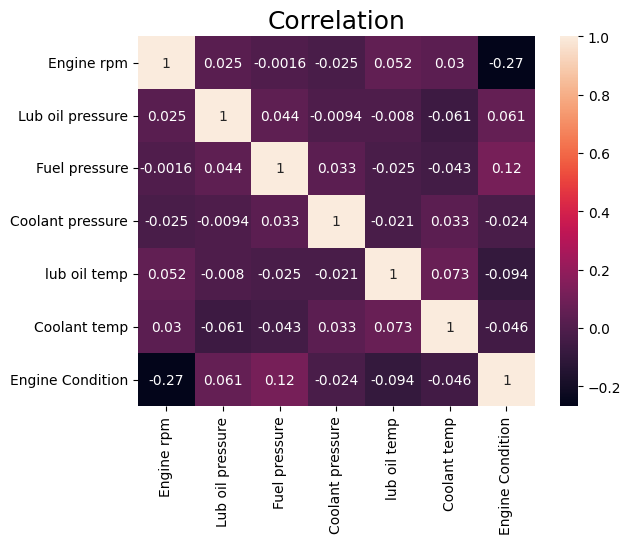

In [16]:
sns.heatmap(corr, annot=True)
plt.title('Correlation', fontsize=18);

## Train - validation - test split

In [17]:
X = data.drop('Engine Condition', axis=1)
y = data['Engine Condition']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=42)

In [19]:
print("train set shape:")
print(X_train.shape)

print("validation set shape:")
print(X_validation.shape)

print("test set shape:")
print(X_test.shape)

train set shape:
(13088, 6)
validation set shape:
(5479, 6)
test set shape:
(968, 6)


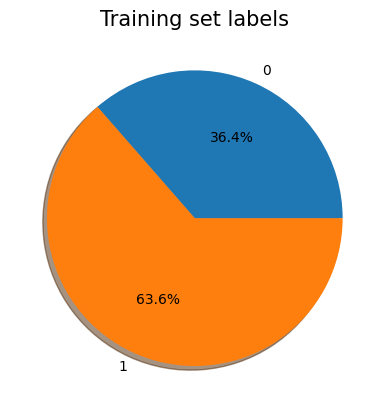

In [20]:
data = []
label = ["0", "1"]

for classNum in range(len(label)):
  data.append(np.sum(np.array(y_train) == classNum)) 

plt.title("Training set labels", fontsize=15)
plt.pie(data, labels=label, shadow=True, autopct='%1.1f%%')
plt.show()

## SMOTE

In [21]:
train_set_OS = SMOTE()
X_train, y_train = train_set_OS.fit_resample(X_train, y_train)

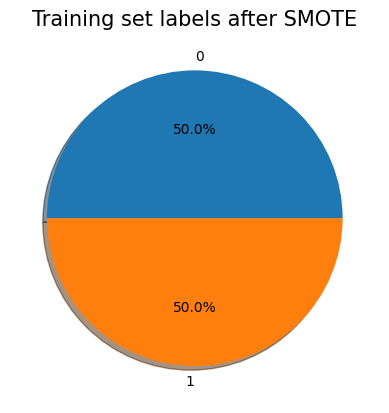

In [22]:
data = []
label=["0", "1"]

for classNum in range(len(label)):
  data.append(np.sum(np.array(y_train) == classNum)) 

plt.title("Training set labels after SMOTE", fontsize=15)
plt.pie(data, labels=label, shadow=True, autopct='%1.1f%%')
plt.show()

In [23]:
print("train set shape:")
print(X_train.shape)

train set shape:
(16640, 6)


## Random Forest Classifier

In [24]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

### Random Forest Classifier - Validation set performance

In [25]:
y_pred = clf.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6313195838656689
Precision: 0.7220285261489698
Recall: 0.6658871674948845


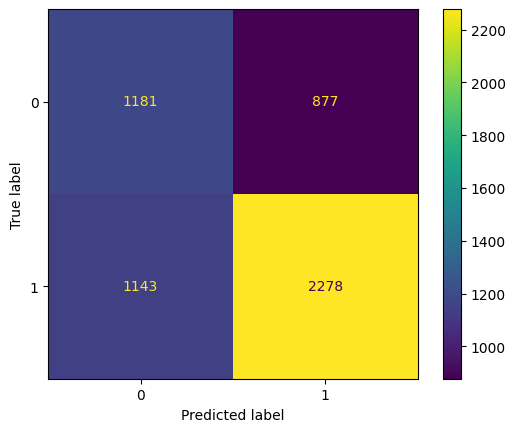

In [26]:
cm = confusion_matrix(y_validation, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Random Forest Classifier - Test set performance

In [27]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6208677685950413
Precision: 0.6896551724137931
Recall: 0.6597222222222222


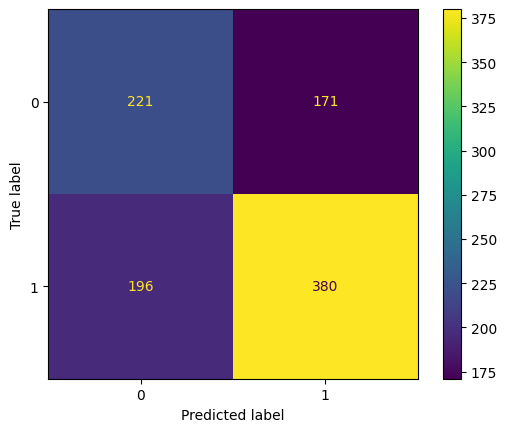

In [28]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();